<a href="https://colab.research.google.com/github/RajnandiniG/ML_NLP-TF/blob/main/5.YoLov3%2Cv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless numpy

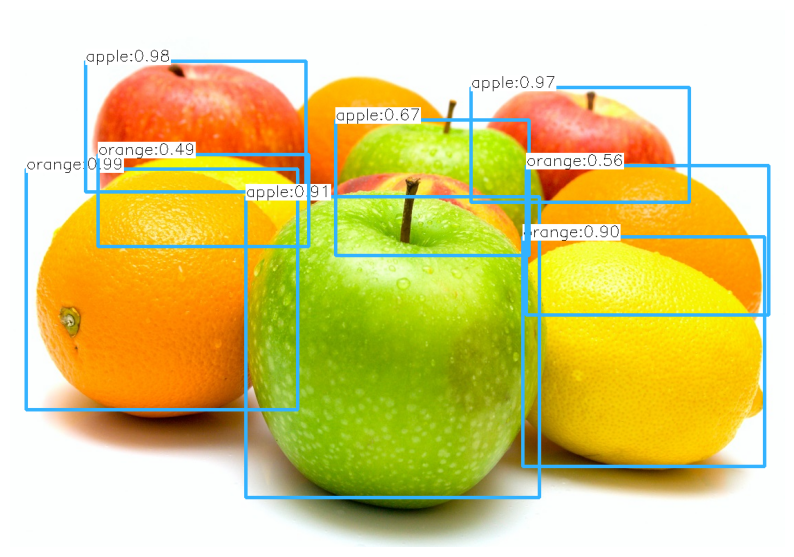

In [5]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Initialize the parameters
confThreshold = 0.4  # Confidence threshold
nmsThreshold = 0.3 # Non-maximum suppression threshold

# Set the image path directly
image_path = '/content/fruit.jpg'


# Load names of classes from COCO
classes = open('/content/coco.names').read().strip().split('\n')

# Load YOLO model
net = cv2.dnn.readNetFromDarknet("/content/yolov3.cfg", "/content/yolov3.weights")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the names of the output layers
def getOutputsNames(net):
    layersNames = net.getLayerNames()
    return [layersNames[i - 1] for i in net.getUnconnectedOutLayers()]

# Draw the predicted bounding box
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    # Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5 * labelSize[1])),
                  (left + round(1.5 * labelSize[0]), top + baseLine),
                  (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 1)

# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outp):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIds = []
    confidences = []
    boxes = []
    for out in outp:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)

# Check if image file exists
if not os.path.isfile(image_path):
    print("Input image file ", image_path, " doesn't exist")
else:
    # Read the image
    frame = cv2.imread(image_path)

    # Create a 4D blob from a frame
    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (416, 416), [0, 0, 0], 1, crop=False)

    # Set the input to the network
    net.setInput(blob)

    # Run the forward pass to get output of the output layers
    outp = net.forward(getOutputsNames(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outp)

    # Save the output image
    outputFile = image_path[:-4] + '_YOLOv3_output.jpg'
    cv2.imwrite(outputFile, frame.astype(np.uint8))

    # Convert BGR to RGB for displaying
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the output image
    plt.figure(figsize=(10, 10))
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

    #print("File with YOLOv3 output is here: ", outputFile)

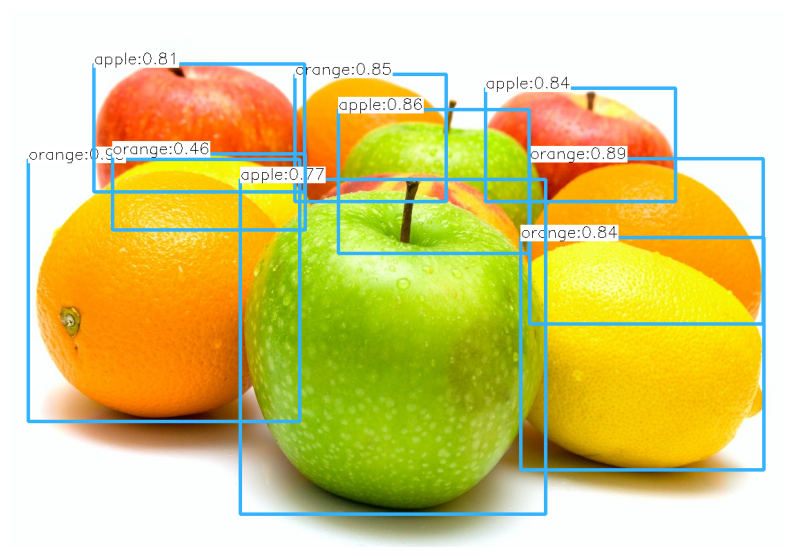

In [9]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Initialize the parameters
confThreshold = 0.4  # Confidence threshold
nmsThreshold = 0.3   # Non-maximum suppression threshold

# Set the image path directly
image_path = '/content/fruit.jpg'

# Load names of classes from COCO
classes = open('/content/coco.names').read().strip().split('\n')

# Load YOLOv4 model
net = cv2.dnn.readNetFromDarknet("/content/yolov4.cfg", "/content/yolov4.weights")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the names of the output layers
def getOutputsNames(net):
    layersNames = net.getLayerNames()
    return [layersNames[i - 1] for i in net.getUnconnectedOutLayers()]

# Draw the predicted bounding box
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    # Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5 * labelSize[1])),
                  (left + round(1.5 * labelSize[0]), top + baseLine),
                  (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 1)

# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outp):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIds = []
    confidences = []
    boxes = []
    for out in outp:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)

# Check if image file exists
if not os.path.isfile(image_path):
    print("Input image file ", image_path, " doesn't exist")
else:
    # Read the image
    frame = cv2.imread(image_path)

    # Create a 4D blob from a frame
    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (416, 416), [0, 0, 0], 1, crop=False)

    # Set the input to the network
    net.setInput(blob)

    # Run the forward pass to get output of the output layers
    outp = net.forward(getOutputsNames(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outp)

    # Save the output image
    outputFile = image_path[:-4] + '_YOLOv4_output.jpg'
    cv2.imwrite(outputFile, frame.astype(np.uint8))

    # Convert BGR to RGB for displaying
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the output image
    plt.figure(figsize=(10, 10))
    plt.imshow(frame)
    plt.axis('off')
    plt.show()